<a href="https://colab.research.google.com/github/UrumeseJoy/ml-projects/blob/main/German_Traffic_Sign_Recognition_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Download and Extraction from Kaggle

In this section, we:
- Upload our Kaggle API token (`kaggle.json`) to the Colab environment.
- Configure the Kaggle API for secure access.
- Download the GTSRB German Traffic Sign dataset directly from Kaggle.
- Extract the contents of the downloaded zip file into a working directory.
- Verify that the dataset has been successfully extracted and is ready for use.


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"urumesejoy","key":"446649bf5b320e0b01dd5f177ff03ea6"}'}

In [3]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

In [5]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 597M/612M [00:03<00:00, 269MB/s]
100% 612M/612M [00:03<00:00, 198MB/s]


In [6]:
import os
print(os.listdir('/content'))

['.config', 'kaggle.json', 'gtsrb-german-traffic-sign.zip', '.ipynb_checkpoints', 'sample_data']


In [7]:
import zipfile

zip_path = '/content/gtsrb-german-traffic-sign.zip'
extract_path = '/content/gtsrb_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print(os.listdir(extract_path))

['Test', 'train', 'Train', 'test', 'Test.csv', 'Train.csv', 'Meta.csv', 'Meta', 'meta']


#Data Loading and Initial Exploration

In [8]:
import pandas as pd

# Paths to CSV files
train_csv = '/content/gtsrb_data/Train.csv'
test_csv = '/content/gtsrb_data/Test.csv'

# Load CSVs
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Show shape and first few rows of training data
print("Training data shape:", train_df.shape)
print(train_df.head())

# Show shape and first few rows of test data
print("\nTest data shape:", test_df.shape)
print(test_df.head())


Training data shape: (39209, 8)
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Test data shape: (12630, 8)
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  T

#Exploratory Data Analysis (EDA)
Visualize Class Distribution

<ipython-input-9-c7ca6b808367>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClassId', data=train_df, palette='viridis')


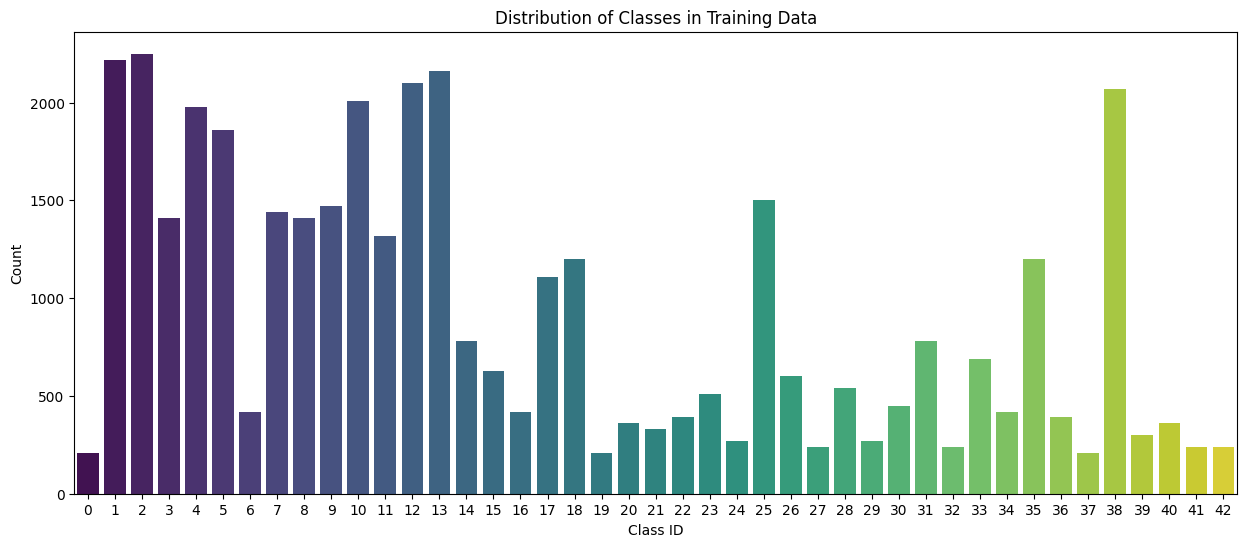

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of classes in training data
plt.figure(figsize=(15,6))
sns.countplot(x='ClassId', data=train_df, palette='viridis')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.show()


 Displaying Reference Images

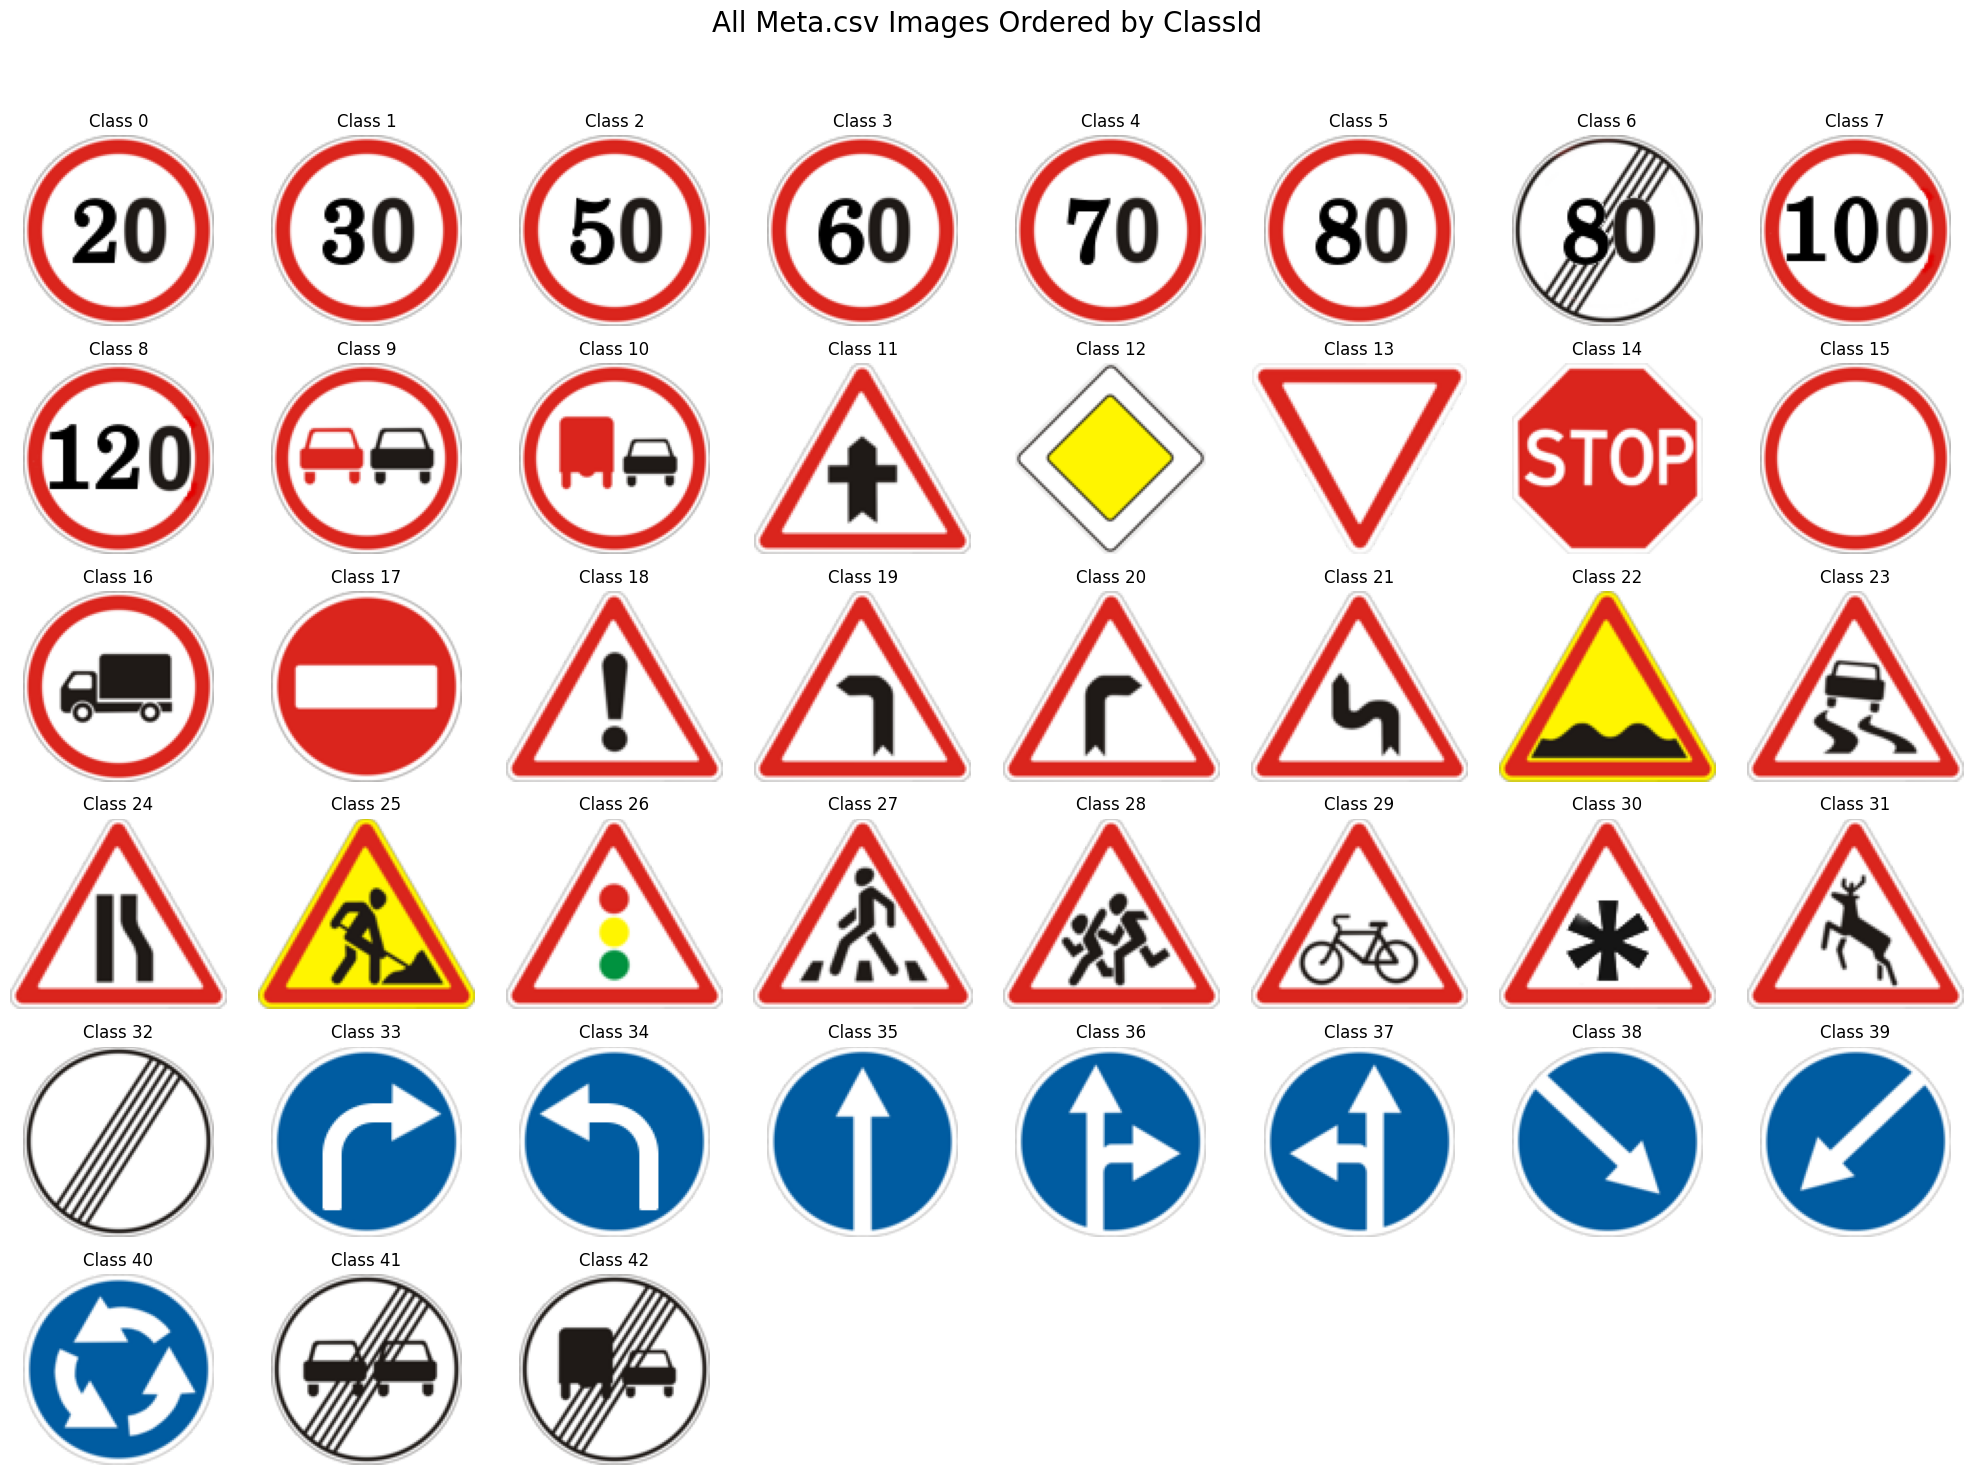

In [30]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# Load Meta.csv
meta_path = '/content/gtsrb_data/Meta.csv'
meta_df = pd.read_csv(meta_path)

# Set up grid
num_classes = 43
cols = 8
rows = (num_classes // cols) + int(num_classes % cols != 0)

plt.figure(figsize=(cols * 2.5, rows * 2.5))

for class_id in range(num_classes):
    # Find the row for this class_id
    row = meta_df[meta_df['ClassId'] == class_id]
    if not row.empty:
        img_path = os.path.join('/content/gtsrb_data', row.iloc[0]['Path'])
        try:
            img = Image.open(img_path)
            plt.subplot(rows, cols, class_id + 1)
            plt.imshow(img)
            plt.title(f"Class {class_id}")
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    else:
        print(f"No image found for ClassId {class_id}")

plt.suptitle('All Meta.csv Images Ordered by ClassId', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Sample Images from Different *Classes*

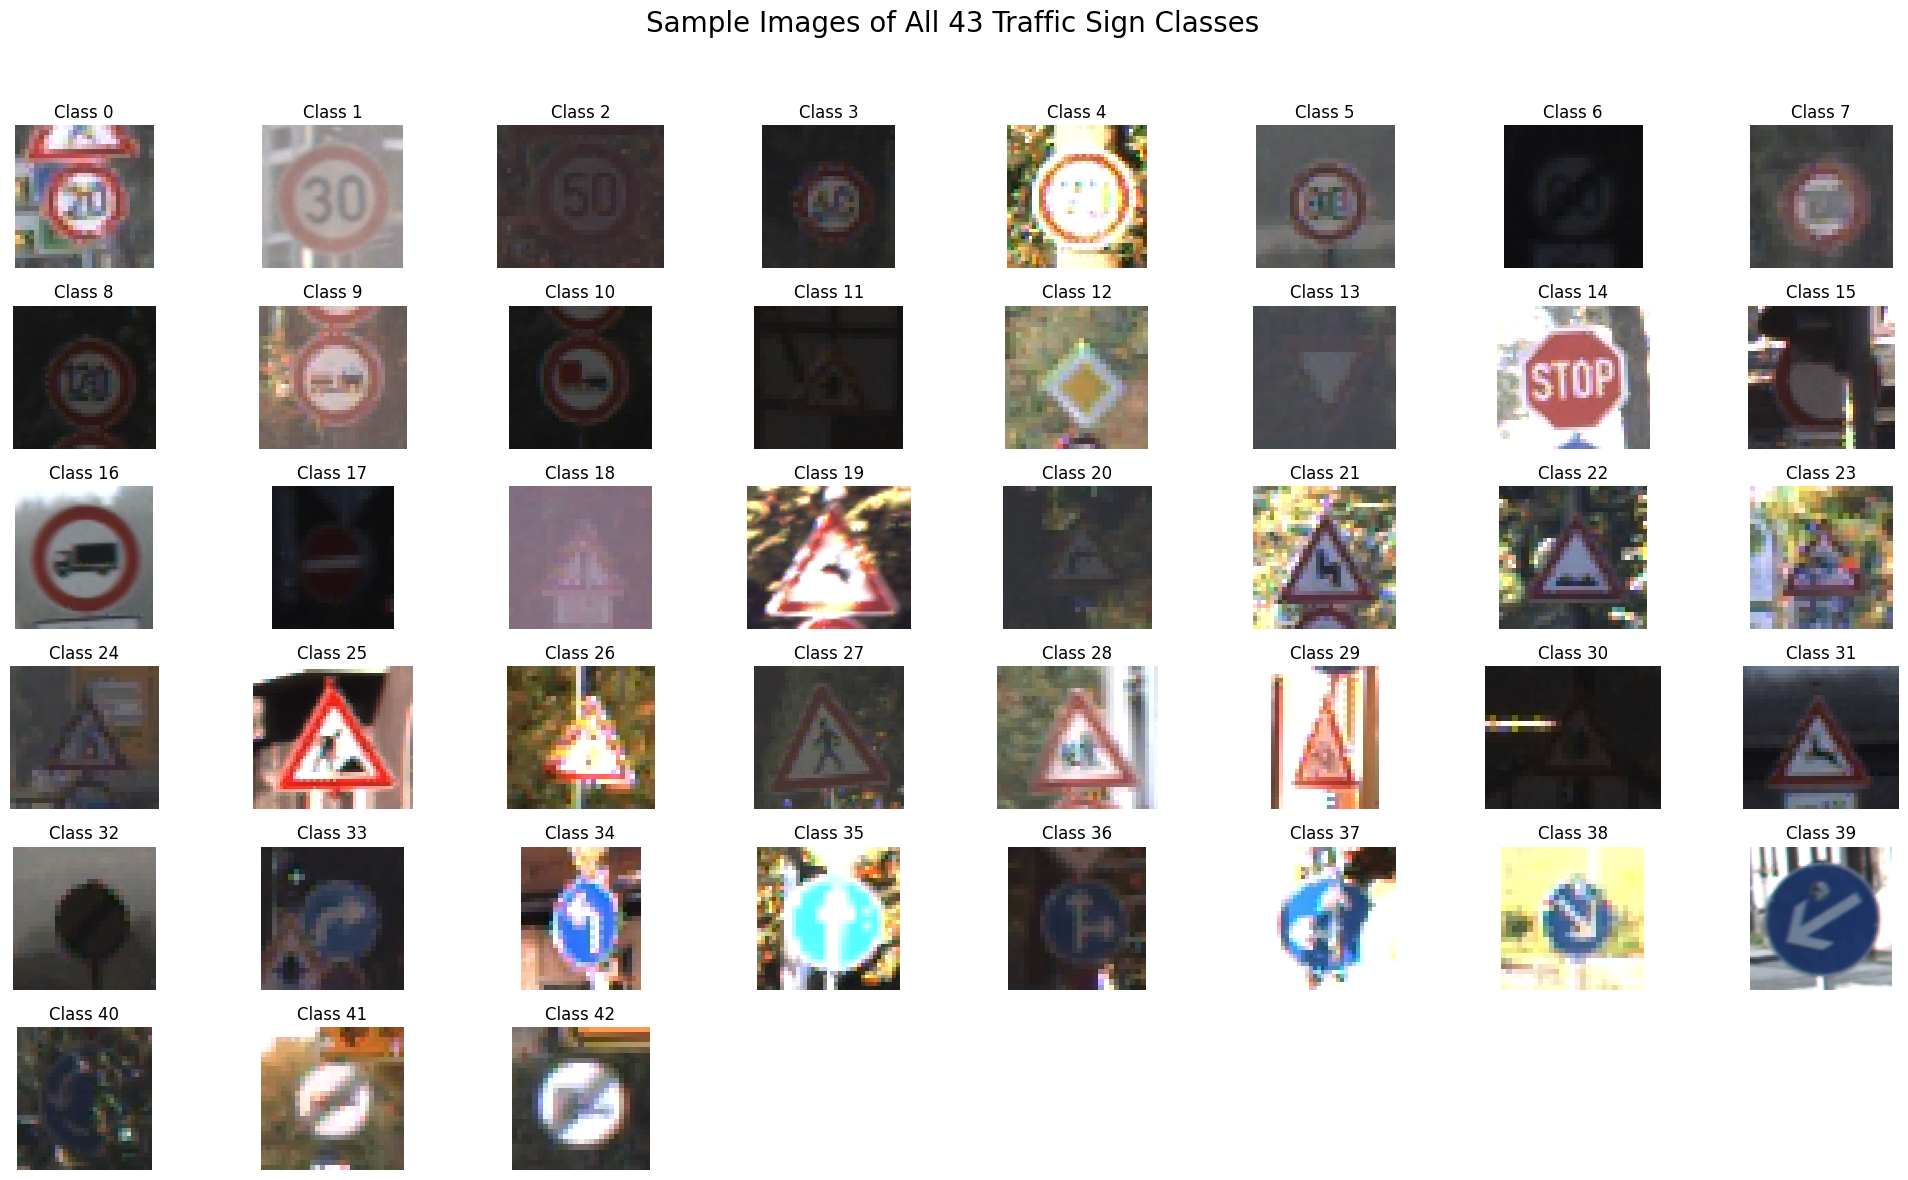

In [11]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd

# Load the training CSV
train_csv = '/content/gtsrb_data/Train.csv'
train_df = pd.read_csv(train_csv)

# Get all unique class IDs
all_classes = sorted(train_df['ClassId'].unique())

# Plot one sample image for each class
plt.figure(figsize=(20, 12))
for i, class_id in enumerate(all_classes):
    # Get the first image path for this class
    sample_path = train_df[train_df['ClassId'] == class_id].iloc[0]['Path']
    img_path = os.path.join('/content/gtsrb_data', sample_path)
    img = Image.open(img_path)
    plt.subplot(6, 8, i+1)  # 6 rows, 8 columns (covers up to 48 images)
    plt.imshow(img)
    plt.title(f'Class {class_id}')
    plt.axis('off')
plt.suptitle('Sample Images of All 43 Traffic Sign Classes', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Data Preprocessing and Train/Validation/Test Split

In this step, we will:
- Load and preprocess all images from the dataset,
- Resize them to a standard size,
- Normalize pixel values,
- Encode the labels,
- Split the data into training, validation, and test sets (70/15/15 split).


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array

# Define image size and number of classes
IMAGE_SIZE = (32, 32)
NUM_CLASSES = 43

def load_and_preprocess_images(df, base_path):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = os.path.join(base_path, row['Path'])
        try:
            img = Image.open(img_path).resize(IMAGE_SIZE)
            img = img.convert('RGB')
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(row['ClassId'])
        except Exception as e:
            print(f'Error loading image {img_path}: {e}')
    return np.array(images), np.array(labels)

# Load images and labels
base_path = '/content/gtsrb_data'
X, y = load_and_preprocess_images(train_df, base_path)

# Split into training, validation, and test sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# One-hot encode labels
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_val_cat = to_categorical(y_val, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

# Show dataset shapes
print(f'Training set shape: {X_train.shape}, Labels shape: {y_train_cat.shape}')
print(f'Validation set shape: {X_val.shape}, Labels shape: {y_val_cat.shape}')
print(f'Test set shape: {X_test.shape}, Labels shape: {y_test_cat.shape}')


Training set shape: (27446, 32, 32, 3), Labels shape: (27446, 43)
Validation set shape: (5881, 32, 32, 3), Labels shape: (5881, 43)
Test set shape: (5882, 32, 32, 3), Labels shape: (5882, 43)


# Data Augmentation Pipeline

To improve model generalization and robustness, we apply data augmentation techniques such as random rotation, zoom, width/height shift, and horizontal flip. This step increases the diversity of the training data and helps prevent overfitting.


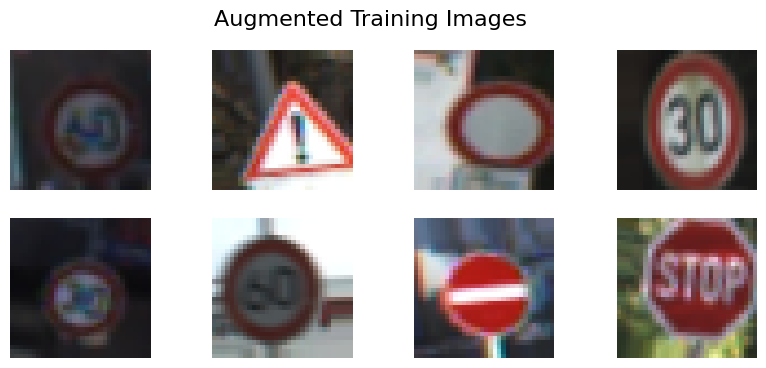

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=False,  # Set to True only if horizontal flip makes sense for your data
    fill_mode='nearest'
)

# For validation and test, only rescale
val_datagen = ImageDataGenerator()

# Create generators
batch_size = 64

train_generator = train_datagen.flow(
    X_train, y_train_cat,
    batch_size=batch_size,
    shuffle=True
)

val_generator = val_datagen.flow(
    X_val, y_val_cat,
    batch_size=batch_size,
    shuffle=False
)

test_generator = val_datagen.flow(
    X_test, y_test_cat,
    batch_size=batch_size,
    shuffle=False
)

# Show some augmented images
import matplotlib.pyplot as plt

augmented_images, _ = next(train_generator)
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Training Images', fontsize=16)
plt.show()


# Model Building and Experimentation

We will now define a Convolutional Neural Network (CNN) architecture suitable for traffic sign classification. This model will be trained using the augmented data pipeline.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 487,243 (1.86 MB)

 Trainable params: 486,859 (1.86 MB)

 Non-trainable params: 384 (1.50 KB)

#Model Training and Performance Curves

We will now train the CNN model using the augmented data pipeline and track performance metrics.  
Key components:
- **Early stopping** to prevent overfitting
- **Model checkpointing** to save the best model
- **Learning rate reduction** on plateau


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.2863 - loss: 2.6271

429/429 ━━━━━━━━━━━━━━━━━━━━ 147s 343ms/step - accuracy: 0.2866 - loss: 2.6258 - val_accuracy: 0.6613 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6575 - loss: 1.0763

429/429 ━━━━━━━━━━━━━━━━━━━━ 138s 322ms/step - accuracy: 0.6576 - loss: 1.0760 - val_accuracy: 0.9459 - val_loss: 0.1737 - learning_rate: 0.0010
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.8048 - loss: 0.6092

429/429 ━━━━━━━━━━━━━━━━━━━━ 136s 316ms/step - accuracy: 0.8048 - loss: 0.6091 - val_accuracy: 0.9747 - val_loss: 0.0773 - learning_rate: 0.0010
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8694 - loss: 0.4058

429/429 ━━━━━━━━━━━━━━━━━━━━ 131s 306ms/step - accuracy: 0.8695 - loss: 0.4057 - val_accuracy: 0.9827 - val_loss: 0.0508 - learning_rate: 0.0010
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9025 - loss: 0.2988

429/429 ━━━━━━━━━━━━━━━━━━━━ 131s 304ms/step - accuracy: 0.9026 - loss: 0.2988 - val_accuracy: 0.9888 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.9287 - loss: 0.2201 - val_accuracy: 0.9879 - val_loss: 0.0400 - learning_rate: 0.0010
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9333 - loss: 0.2201

429/429 ━━━━━━━━━━━━━━━━━━━━ 134s 311ms/step - accuracy: 0.9333 - loss: 0.2201 - val_accuracy: 0.9908 - val_loss: 0.0290 - learning_rate: 0.0010
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9448 - loss: 0.1707

429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 304ms/step - accuracy: 0.9448 - loss: 0.1707 - val_accuracy: 0.9964 - val_loss: 0.0140 - learning_rate: 0.0010
Epoch 9/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.9542 - loss: 0.1490 - val_accuracy: 0.9791 - val_loss: 0.0737 - learning_rate: 0.0010
Epoch 10/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 131s 305ms/step - accuracy: 0.9523 - loss: 0.1501 - val_accuracy: 0.9954 - val_loss: 0.0167 - learning_rate: 0.0010
Epoch 11/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9596 - loss: 0.1314

429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 302ms/step - accuracy: 0.9596 - loss: 0.1314 - val_accuracy: 0.9966 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 12/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 303ms/step - accuracy: 0.9616 - loss: 0.1342 - val_accuracy: 0.9963 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 13/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 142s 304ms/step - accuracy: 0.9655 - loss: 0.1083 - val_accuracy: 0.9895 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 14/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9682 - loss: 0.1068

429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 302ms/step - accuracy: 0.9682 - loss: 0.1067 - val_accuracy: 0.9968 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 15/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9698 - loss: 0.1006

429/429 ━━━━━━━━━━━━━━━━━━━━ 143s 305ms/step - accuracy: 0.9698 - loss: 0.1006 - val_accuracy: 0.9978 - val_loss: 0.0082 - learning_rate: 0.0010
Epoch 16/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 134s 313ms/step - accuracy: 0.9697 - loss: 0.0951 - val_accuracy: 0.9966 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 17/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9690 - loss: 0.1032

429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 304ms/step - accuracy: 0.9690 - loss: 0.1032 - val_accuracy: 0.9981 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 18/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9751 - loss: 0.0834

429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.9751 - loss: 0.0834 - val_accuracy: 0.9985 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 19/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 131s 304ms/step - accuracy: 0.9715 - loss: 0.0962 - val_accuracy: 0.9974 - val_loss: 0.0114 - learning_rate: 0.0010
Epoch 20/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9770 - loss: 0.0823

429/429 ━━━━━━━━━━━━━━━━━━━━ 131s 305ms/step - accuracy: 0.9770 - loss: 0.0823 - val_accuracy: 0.9990 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 21/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 302ms/step - accuracy: 0.9763 - loss: 0.0737 - val_accuracy: 0.9980 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 22/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 304ms/step - accuracy: 0.9770 - loss: 0.0784 - val_accuracy: 0.9976 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 23/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 302ms/step - accuracy: 0.9777 - loss: 0.0756 - val_accuracy: 0.9986 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 24/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 133s 310ms/step - accuracy: 0.9822 - loss: 0.0600 - val_accuracy: 0.9985 - val_loss: 0.0073 - learning_rate: 0.0010
Epoch 25/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 132s 308ms/step - accuracy: 0.9788 - loss: 0.0703 - val_accuracy: 0.9978 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 26/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9

429/429 ━━━━━━━━━━━━━━━━━━━━ 132s 308ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9993 - val_loss: 0.0041 - learning_rate: 2.0000e-04
Epoch 27/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 140s 303ms/step - accuracy: 0.9879 - loss: 0.0415 - val_accuracy: 0.9993 - val_loss: 0.0046 - learning_rate: 2.0000e-04
Epoch 28/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 141s 301ms/step - accuracy: 0.9898 - loss: 0.0342 - val_accuracy: 0.9993 - val_loss: 0.0051 - learning_rate: 2.0000e-04
Epoch 29/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 143s 304ms/step - accuracy: 0.9901 - loss: 0.0347 - val_accuracy: 0.9991 - val_loss: 0.0041 - learning_rate: 2.0000e-04
Epoch 30/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9900 - loss: 0.0339

429/429 ━━━━━━━━━━━━━━━━━━━━ 134s 312ms/step - accuracy: 0.9900 - loss: 0.0339 - val_accuracy: 0.9995 - val_loss: 0.0036 - learning_rate: 2.0000e-04
Epoch 31/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 304ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9995 - val_loss: 0.0035 - learning_rate: 2.0000e-04
Epoch 32/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.9897 - loss: 0.0347 - val_accuracy: 0.9995 - val_loss: 0.0036 - learning_rate: 2.0000e-04
Epoch 33/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 143s 304ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9993 - val_loss: 0.0036 - learning_rate: 2.0000e-04
Epoch 34/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 304ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9993 - val_loss: 0.0041 - learning_rate: 2.0000e-04
Epoch 35/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 129s 301ms/step - accuracy: 0.9912 - loss: 0.0246 - val_accuracy: 0.9995 - val_loss: 0.0041 - learning_rate: 2.0000e-04
Epoch 36/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 130s 

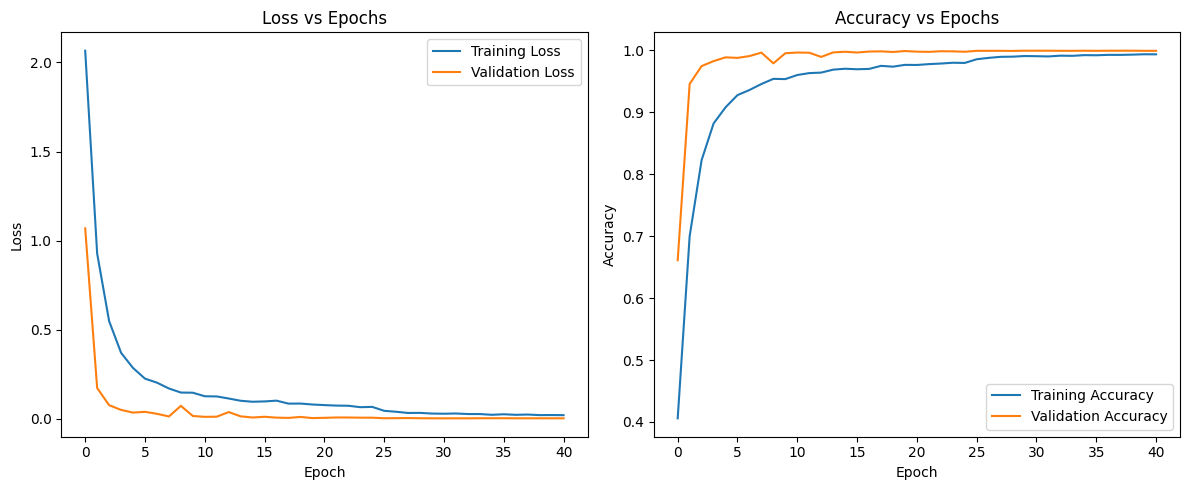

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

# Train the model
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks
)

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Model Evaluation and Confusion Matrix

We now evaluate the trained model on the test set, print the classification report and confusion matrix, and visualize a few sample predictions to better understand the model's strengths and weaknesses.


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00       333
           2       1.00      1.00      1.00       338
           3       1.00      1.00      1.00       212
           4       1.00      1.00      1.00       297
           5       1.00      1.00      1.00       279
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00       216
           8       1.00      1.00      1.00       212
           9       1.00      1.00      1.00       221
          10       1.00      1.00      1.00       302
          11       1.00      1.00      1.00       198
          12       1.00      1.00      1.00       315
          13       1.00      1.00      1.00       324
          14       1.00      1.00      1.00       117
          15       1.00      1.00      1.00        95
          16   

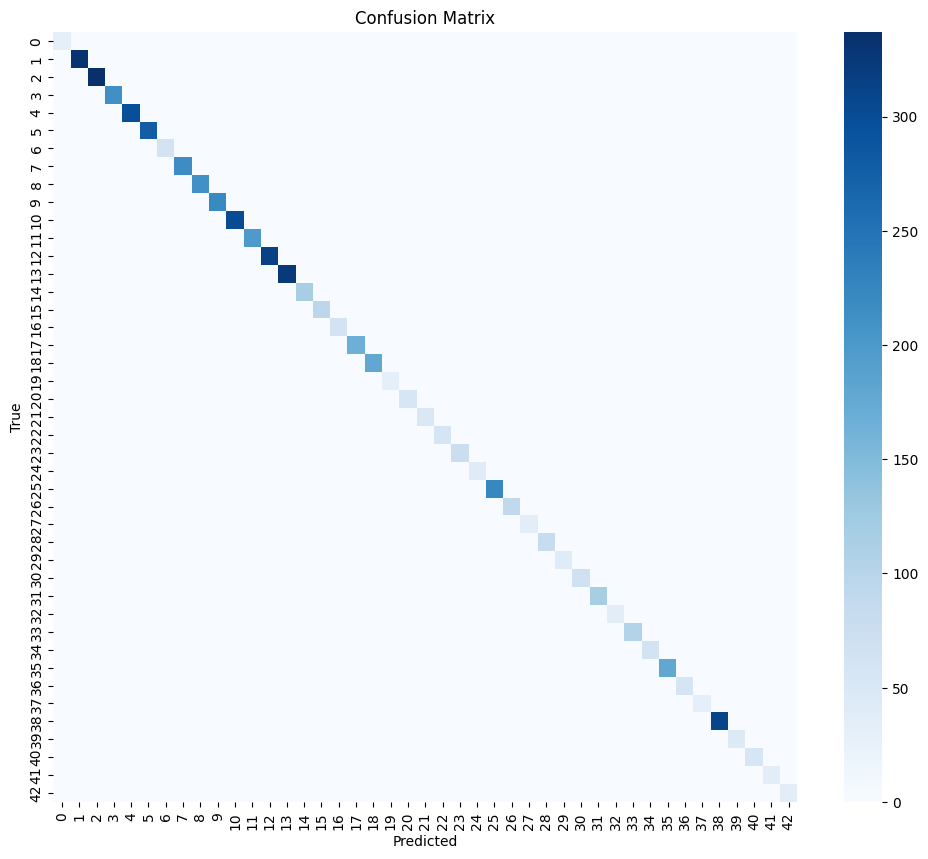

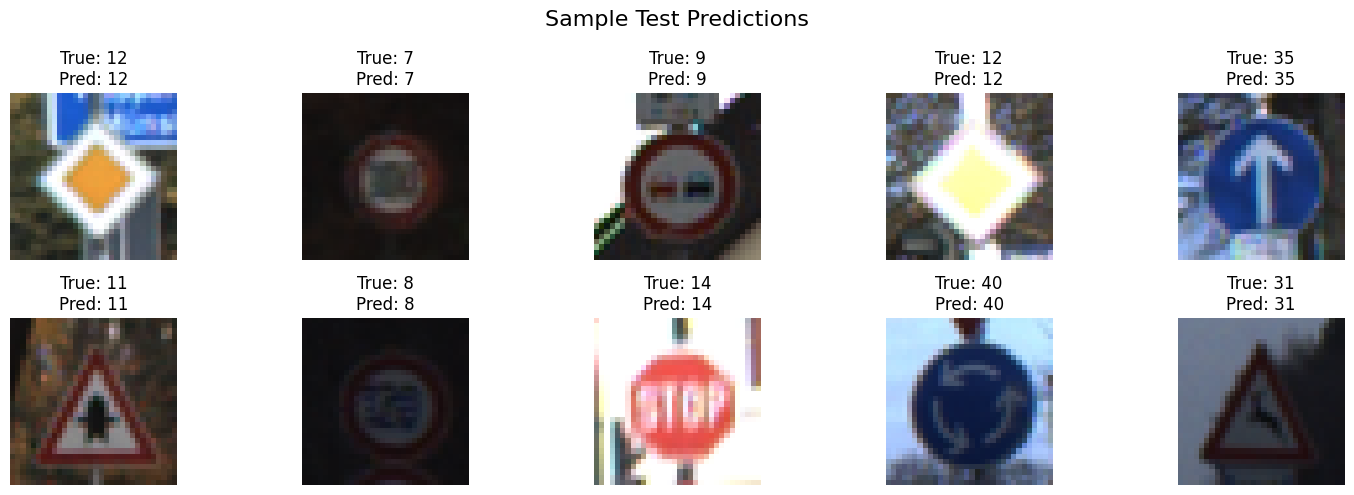

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show a few test images with their predicted and true labels
class_labels = sorted(train_df['ClassId'].unique())
plt.figure(figsize=(15, 5))
for i in range(10):
    img = X_test[i]
    true_label = y_true[i]
    pred_label = y_pred[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.suptitle('Sample Test Predictions', fontsize=16)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


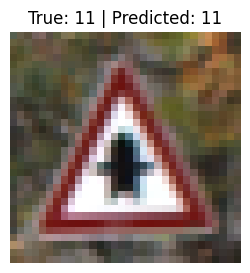

In [18]:
import random

# Pick a random index from the test set
rand_idx = random.randint(0, X_test.shape[0] - 1)
img = X_test[rand_idx]
true_label = np.argmax(y_test_cat[rand_idx])

# Predict
img_expanded = np.expand_dims(img, axis=0)
pred_probs = model.predict(img_expanded)
pred_label = np.argmax(pred_probs, axis=1)[0]

# Display image with true and predicted labels
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title(f"True: {true_label} | Predicted: {pred_label}")
plt.axis('off')
plt.show()


Displaying Predictions with *Sign* Names Array


In [32]:
sign_names = [
    "Speed limit (20km/h)",                    # 0
    "Speed limit (30km/h)",                    # 1
    "Speed limit (50km/h)",                    # 2
    "Speed limit (60km/h)",                    # 3
    "Speed limit (70km/h)",                    # 4
    "Speed limit (80km/h)",                    # 5
    "End of speed limit (80km/h)",             # 6
    "Speed limit (100km/h)",                   # 7
    "Speed limit (120km/h)",                   # 8
    "No passing",                              # 9
    "No passing for vehicles over 3.5 tons",   # 10
    "Right-of-way at the next intersection",   # 11
    "Priority road",                           # 12
    "Yield",                                   # 13
    "Stop",                                    # 14
    "No vehicles",                             # 15
    "Vehicles over 3.5 tons prohibited",       # 16
    "No entry",                                # 17
    "General caution",                         # 18
    "Dangerous curve to the left",             # 19
    "Dangerous curve to the right",            # 20
    "Double curve",                            # 21
    "Bumpy road",                              # 22
    "Slippery road",                           # 23
    "Road narrows on the right",               # 24
    "Road work",                               # 25
    "Traffic signals",                         # 26
    "Pedestrians",                             # 27
    "Children crossing",                       # 28
    "Bicycles crossing",                       # 29
    "Beware of ice/snow",                      # 30
    "Wild animals crossing",                   # 31
    "End of all speed and passing limits",     # 32
    "Turn right ahead",                        # 33
    "Turn left ahead",                         # 34
    "Ahead only",                              # 35
    "Go straight or right",                    # 36
    "Go straight or left",                     # 37
    "Keep right",                              # 38
    "Keep left",                               # 39
    "Roundabout mandatory",                    # 40
    "End of no passing",                       # 41
    "End of no passing by vehicles over 3.5 tons" # 42
]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


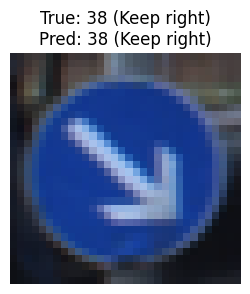

In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Pick a random test image
rand_idx = random.randint(0, len(X_test)-1)
img = X_test[rand_idx]
true_label = y_test[rand_idx]
true_name = sign_names[true_label]

# Predict
img_expanded = np.expand_dims(img, axis=0)
pred_probs = model.predict(img_expanded)
pred_label = np.argmax(pred_probs, axis=1)[0]
pred_name = sign_names[pred_label]

# Display image with true and predicted labels/names
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title(f"True: {true_label} ({true_name})\nPred: {pred_label} ({pred_name})")
plt.axis('off')
plt.show()


In [38]:
# Evaluate the model on the test set arrays
score = model.evaluate(X_test, y_test_cat, verbose=1)

# Print the test loss and accuracy
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')
print(f'Test accuracy: {score[1]*100:.2f}%')


184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9996 - loss: 0.0013
Test loss: 0.0018
Test accuracy: 0.9993
Test accuracy: 99.93%


#Saving the Model

In [36]:
# Save the model in the native Keras format (.keras)
model_save_path = '/content/gtsrb_traffic_sign_model.keras'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/gtsrb_traffic_sign_model.keras


In [37]:
from google.colab import files
files.download(model_save_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>